In [1]:
import bluepysnap
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import seaborn as sns

In [2]:
color_exc = 'red'
color_inh = 'tab:blue'

In [3]:
# Path to the folder containing simulation_config.json
# The RESULTS folder with spike.out must be located as specified in simulation_config.json
# Ensure the RESULTS folder is correctly placed to enable plotting of spikes

# RESULTS of the simulation containing spike.out can be downloaded from 10.5281/zenodo.14187063
# Simulation_conifg folder can be found in this repository in folder ../simulation/

results_path = '/gpfs/bbp.cscs.ch/data/project/proj137/farinaNGV/Paper_results/my_simulation/'

In [4]:
sim14_met_path =results_path+"simulation_config_young.json"
sim14_met = bluepysnap.Simulation(sim14_met_path)

In [5]:
spikes_met = sim14_met.spikes

In [6]:
sim14_ndam_path =results_path+"simulation_config_ndam.json"
sim14_ndam = bluepysnap.Simulation(sim14_ndam_path)

In [7]:
spikes_ndam = sim14_ndam.spikes

In [8]:
layer_consider = [{1},{2,3},{4},{5},{6}, {1,2,3,4,5,6}]

/gpfs/bbp.cscs.ch/home/sfarina/multiscale_kernel/lib/python3.8/site-packages/bluepysnap/simulation.py:55: RuntimeWarning: Simulation node sets overwrite 1 node set(s) in Circuit node sets: Layer1
  warnings.warn(


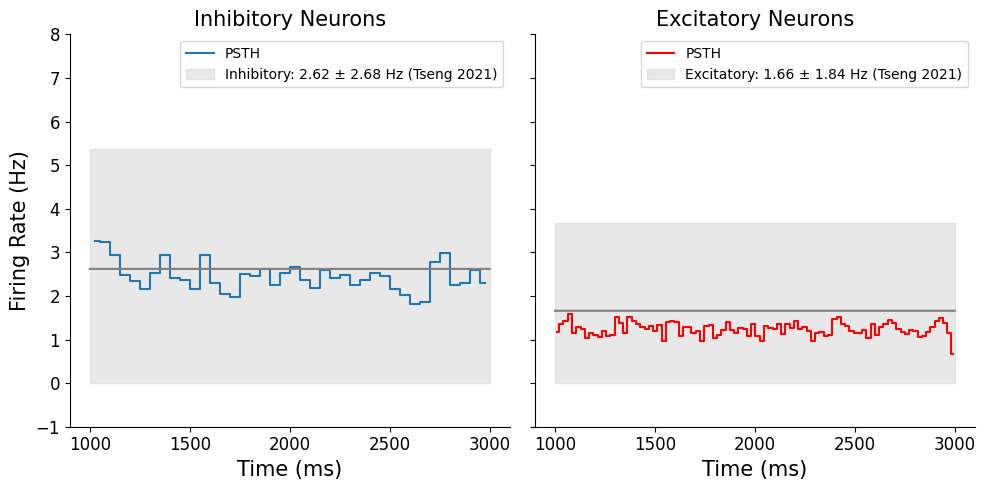

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Define the time range for filtering
t1 = 1000
t2 = 3000

# Firing rate values
inh_mean = 2.62  # mean of inhibitory
inh_std = 2.68   # std deviation of inhibitory
exc_mean = 1.66  # mean of excitatory
exc_std = 1.84   # std deviation of excitatory


exc_rect = patches.Rectangle(
    (1000, 0),  # Bottom left corner (x, y)
    t2-t1,                        # Width of the rectangle
    exc_std * 2,             # Height (2 std deviations)
    linewidth=1,
    edgecolor='lightgrey',
    facecolor='lightgrey',
    alpha=0.5,
    label='Excitatory: 1.66 ± 1.84 Hz (Tseng 2021)'
)

# Inhibitory rectangle
inh_rect = patches.Rectangle(
    (1000, 0),  # Bottom left corner (x, y)
    t2-t1,                        # Width of the rectangle
    inh_std * 2,             # Height (2 std deviations)
    linewidth=1,
    edgecolor='lightgrey',
    facecolor='lightgrey',
    alpha=0.5,
    label='Inhibitory: 2.62 ± 2.68 Hz (Tseng 2021)'
)




# Plot histogram for inhibitory neurons
filtered_inh = spikes_met.filter(group={'layer': layer_consider[-1], 'synapse_class': {'INH'}}, t_start=t1, t_stop=t2)
filtered_inh.firing_rate_histogram(ax=axs[0])  # Plot histogram
# Change color of the lines in the histogram to blue
for line in axs[0].get_lines():
    line.set_color('tab:blue')

# Plot histogram for excitatory neurons
filtered_exc = spikes_met.filter(group={'layer': layer_consider[-1], 'synapse_class': {'EXC'}}, t_start=t1, t_stop=t2)
filtered_exc.firing_rate_histogram(ax=axs[1])  # Plot histogram
# Change color of the lines in the histogram to red
for line in axs[1].get_lines():
    line.set_color('r')
    
# Define rectangles and mean lines
axs[0].add_patch(inh_rect)
axs[0].plot(np.arange(t1, t2), np.ones(t2 - t1) * inh_mean, c='grey')

axs[1].add_patch(exc_rect)
axs[1].plot(np.arange(t1, t2), np.ones(t2 - t1) * exc_mean, c='grey')

# Set axis labels and title
axs[0].set_ylabel('Firing Rate (Hz)', fontsize=15)
axs[0].set_xlabel('Time (ms)', fontsize=15)
axs[1].set_xlabel('Time (ms)', fontsize=15)
axs[0].set_title('Inhibitory Neurons', fontsize=15)
axs[1].set_title('Excitatory Neurons', fontsize=15)
axs[0].set_ylim(-1,8)
axs[0].tick_params(axis='both', labelsize=12)
axs[1].tick_params(axis='both', labelsize=12)
    
# Final touches
plt.tight_layout()
resolution_value = 1200

axs[0].spines[['right', 'top']].set_visible(False)
axs[1].spines[['right', 'top']].set_visible(False)

# Show legend
axs[0].legend()
axs[1].legend()

# Show the figure
#plt.savefig("./RESULTS/Figure2b.pdf", format="pdf", dpi=resolution_value, bbox_inches='tight')